<a href="https://colab.research.google.com/github/joewebkid/basics_of_statistics/blob/main/part_1/3_%D0%9A%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D1%8F_%D0%B8_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 3.1. Понятия корреляции
***
#### 3.1.1. Корреляция
**Корреляция** суммирует силу и направление линейной (прямой) связи между двумя или более количественными переменными - случайных величин. Обозначается r, принимает значения от $-1$ до $+1$.

**Корреляционная матрица**
Это матрица, в которой позиция $ij$ определяет корреляцию между $i^м$ и $j^м$ параметром данного набора данных.

[](http://espressocode.top/exploring-correlation-in-python/)

#### 3.1.2. Ковариация 

(ко - совместная, вариация - изменчивость). Мера **линейной** зависимости двух случайных величин.

Если ковариация положительна, то с ростом значений одной случайной величины, значения второй имеют тенденцию возрастать, а если знак отрицательный — то убывать.

$$ cov(X, Y) = \frac{\sum{(x_i - \bar{x})(y_i - \bar{x})}}{N - 1} $$
где N - количество случайных величин, а единица - количество степеней свободы.

Однако только по **абсолютному** значению ковариации **нельзя судить** о том, **насколько сильно величины взаимосвязаны**, так как масштаб ковариации зависит от их дисперсий. Значение ковариации можно нормировать, поделив её на произведение среднеквадратических отклонений (квадратных корней из дисперсий) случайных величин. Полученная величина называется коэффициентом корреляции Пирсона, который всегда находится в интервале от −1 до 1:

$$ r(x, y) = \frac{cov(x, y)}{\sigma_x\sigma_y}$$

##### 3.1.2.1. Подробнее про формулу корреляции

Давайте остановимся на формуле коэффициента корреляции, которую мы получили:
$$ r(x, y) = \frac{cov(x, y)}{\sigma_x\sigma_y}$$
запишем формулу чуть подробнее и выполним возможные преобразования:

$$ r(x, y) = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{(N - 1)\sqrt{\sum{\frac{(x_i - \bar{x})^2}{N-1}}}\sqrt{\sum{\frac{(y_i - \bar{y})^2}{N-1}}}} $$

теперь вынесем 1/ (N - 1) из под корней 

$$ r(x, y) = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{(N - 1)\frac{1}{(N-1)}\sqrt{\sum{(x_i - \bar{x})^2}}\sqrt{\sum{(y_i - \bar{y})^2}}} $$

и сократим (N - 1)

$$ r(x, y) = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sqrt{\sum{(x_i - \bar{x})^2}}\sqrt{\sum{(y_i - \bar{y})^2}}} $$

таким образом, мы сократили N - 1 в знаменателе и получили финальную формулу для коэффициента корреляции, которую вы часто сможете встретить в учебниках:

$$ r(x, y) = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sqrt{\sum{(x_i - \bar{x})^2}\sum{(y_i - \bar{y})^2}}} $$

In [ ]:
'''Демонстрация работы ковариации и корреляции'''
import numpy as np
import random as r

def cov(x, y):
    assert x.size == y.size
    return ((x - x.mean()) * (y - y.mean())).sum()/(x.size - 1)

def cor(x, y):
    return cov(x, y)/(np.std(x, ddof=1)*np.std(y, ddof=1))

# функция имитирущая случаные факторы
# р - настолько существенным будет случайный фактор
def randomize(arr, p):
    alpha = np.max(arr) - np.min(arr)
    res = np.zeros(arr.shape)
    for i, v in enumerate(arr):
        sign = 1 if r.choice([True, False]) else -1
        res[i] = v + sign*alpha*r.random()*p
    return res

In [ ]:
x = np.array(range(30))
y = randomize(x, 0.1)
y1 = randomize(x, 0.5)
y2 = randomize(x, 1)

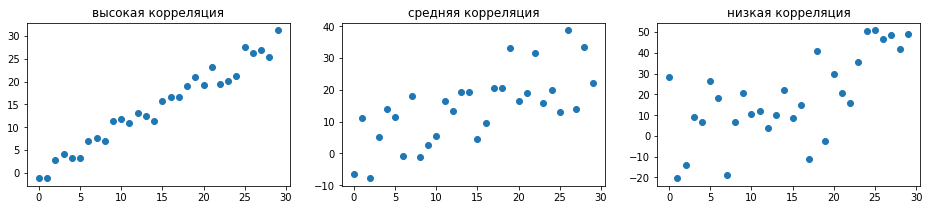

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 3))
ax1.scatter(x, y)
ax2.scatter(x, y1)
ax3.scatter(x, y2)
ax1.set_title('высокая корреляция')
ax2.set_title('средняя корреляция')
ax3.set_title('низкая корреляция')
plt.show()

In [ ]:
print(f'''
cov1: {cov(x, y):.2f}
cov2: {cov(x, y1):.2f}
cov3: {cov(x, y2):.2f}

cor1: {cor(x, y):.2f}
cor2: {cor(x, y1):.2f}
cor3: {cor(x, y2):.2f}
''')


cov1: 77.81
cov2: 70.08
cov3: 124.21

cor1: 0.98
cor2: 0.70
cor3: 0.68



[Корреляция калкулятор](http://rpsychologist.com/d3/correlation/)

####3.1.3. Коэффициент корреляции

$r_{xy}$ — показатель силы и направления взаимосвязи

двух количественных переменных

Принимает значения [-1, 1]

Знак коэффициента корреляции показывает
направление взаимосвязи


####3.1.4. Коэффициент детерминации

$R^2 = r_{xy}^2$ — показывает, в какой степени дисперсия
одной переменной обусловлена , влиянием
другой переменной

Равен квадрату коэффициента корреляции

Принимает значения [0, 1]


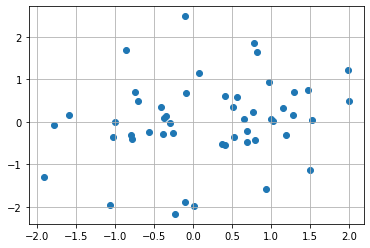

data: x and y
t = 2.06697, df = 48, p-value = 0.04415
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
[0.00819306 0.52264617]
sample estimates:
cor
0.2858888


In [ ]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

def cortest(corr, lenX):
    #t value
    t = corr[0] * ((len(X) - 2) / (1 - corr[0]**2))**0.5
    print("data: x and y")
    print("t = {}, df = {}, p-value = {}".format(round(t,5), len(X)-2, round(stats.t.sf(np.abs(t), 48)*2,5)))

    # Use the Fisher transformation to get z
    z = np.arctanh(corr[0])
    #print("z value: {}".format(z))

    # And, the sigma value i.e standard error
    sigma = (1/((len(X)-3)**0.5))
    #print("sigma value: {}".format(sigma))

    # Get normal 95% interval probability density function for normal continuous random variable apply two-sided conditional formula
    cint = z + np.array([-1, 1]) * sigma * stats.norm.ppf((1+0.95)/2)
    
    #Finally take hyperbolic tangent to get interval values for 95%
    interval = np.tanh(cint)
    
    if corr != 0:
        print("alternative hypothesis: true correlation is not equal to 0")
    print("95 percent confidence interval:")
    print(interval)
    print("sample estimates:")
    print("cor")
    print(corr[0])

# так вычисляем корреляцию
X = stats.norm.rvs(loc=0, scale=1, size=50)
Y = stats.norm.rvs(loc=0, scale=1, size=50)
corr = stats.pearsonr(X, Y)

# так строим scatter plot
plt.scatter(X,Y)
plt.grid()
plt.show()

#print("correlation: {}".format(corr))

#т.к. из лекции мы не знаем выборки, то сразу подставляем корреляцию из лекции
cortest((0.2858888,), 50)

[Значимость коэффициента корреляции, доверительный интервал](http://statistica.ru/theory/znachimost-koeffitsienta-korrelyatsii-doveritelnyy-interval/)

[калькулятор](https://www.socscistatistics.com/pvalues/pearsondistribution.aspx)

[on-line калькулятор для расчета значений p](http://www.danielsoper.com/statcalc3/calc.aspx?id=44)

[Ложные корреляции](https://www.popmech.ru/science/237232-lozhnye-korrelyatsii-kak-nikolas-keydzh-vliyaet-na-smert-v-basseyne/)

In [ ]:
from pydoc import help
from scipy.stats.stats import pearsonr

A = """X Y
4 2
5 1
2 4
3 3
1 5"""

x, y = [], []

[(x.append(int(a[0])), y.append(int(a[2]))) for a in A.split('\n') if a[0].isdigit()]

pearsonr(x, y)

(-1.0, 0.0)

### 3.2. Условия применения коэффициента корреляции
***
Коэффициент Пирсона - коэфициент ЛИНЕЙНОЙ корреляции. Если корреляция линейная, форма распределения (нормальное, не нормальное), наличие выбросов никакого значения не имеют.

В регрессионном анализе линейные зависимости по экспериментальным данным строят﻿ с помощью [метода наименьших квадратов](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BD%D0%B0%D0%B8%D0%BC%D0%B5%D0%BD%D1%8C%D1%88%D0%B8%D1%85_%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82%D0%BE%D0%B2) ﻿ 
Для защиты от выбросов такой метод применяется с весами. то есть при расчете коэффициентов $a$ и $b$ прямой $$f(x)=a*x+b$$ выбросы в сумме учитываются с меньшим множителем 

С помощью медианы и других родственных ей параметров (квартили, межквартильный интервал, медианное абсолютное отклонение) можно выявлять выбросы или оценивать взаимосвязь, не опасаясь влияния выбросов(подход реализован в программе GraphPad Prism).

Но у этого подхода есть свои недостатки и ограничения, поэтому он не очень распространён. Кроме того, выбросы не всегда правильно игнорировать - иногда они сигнализируют о существовании дополнительного влияющего фактора, который нужно учесть, а не просто отбрасывать эти значения.

[Generating Datasets with Varied Appearance and Identical Statistics](https://www.autodesk.com/research/publications/same-stats-different-graphs)

Коэффициент корреляции Спирмена 

Коэффициент корреляции Пирсона (r-Пирсона) применяется для исследования взаимосвязи двух переменных, измеренных в метрических шкалах на одной и той же выборке. Он позволяет определить, насколько пропорциональная изменчивость двух переменных.

Данный коэффициент разработали Карл Пирсон, Фрэнсис Эджуорт и Рафаэль Уэлдон в 90-х годах XIX века. Коэффициент корреляции изменяется в пределах от минус единицы до плюс единицы.

Коэффициент корреляции r-Пирсона характеризует существование линейной связи между двумя величинами. Если связь криволинейная то он не будет работать.

Чтобы приступать к расчетам коэффициента корреляции r-Пирсона необходимо выполнение следующих условий:

Исследуемые переменные X и Y должны быть распределены нормально.
Исследуемые переменные X и Y должны быть измерены в интервальной шкале или шкале отношений.
Количество значений в исследуемых переменных X и Y должно быть одинаковым.
При расчете коэффициент линейной корреляции Пирсона используется специальная формула. Величина коэффициента корреляции варьируется от 0 до 1

Слабыми сторонами линейного коэффициента корреляции Пирсона являются:

Неустойчивость к выбросам.

С помощью коэффициента корреляции Пирсона можно определить только силу линейной взаимосвязи между переменными, другие виды взаимосвязей выявляются методами регрессионного анализа.
[Коэффициент ранговой корреляции Спирмена](https://math.semestr.ru/corel/spirmen.php)

Коэффициент корреляции тау Кендалла

Непараметрические методы разработаны для тех ситуаций, когда исследователь ничего не знает о параметрах исследуемой популяции (отсюда и название методов - непараметрические). Говоря более специальным языком, непараметрические методы не основываются на оценке параметров (таких как среднее или стандартное отклонение) при описании выборочного распределения интересующей величины.

Поэтому эти методы иногда также называются свободными от параметров или свободно распределенными.

Непараметрические методы позволяют обрабатывать данные "низкого качества" из выборок малого объема с переменными, про распределение которых мало что или вообще ничего не известно.

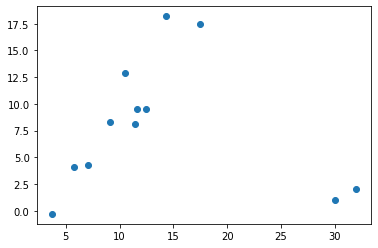

Коэффициент корреляции Спирмана: 0.242
Переменные не коррелируют (принимаем нулевую гипотезу) p=0.449
Коэффициент корреляции Кендалла: 0.290
Переменные не коррелируют (принимаем нулевую гипотезу) p=0.192


In [ ]:
# вычислить корреляцию между двумя выборками
from matplotlib import pyplot
from scipy.stats import spearmanr,kendalltau

# подготовим данные
data1 = [3.7, 5.8, 7.1, 9.1, 10.5, 11.4, 11.6, 12.5, 14.3, 17.5, 30.0, 32.0]
data2 = [-0.3, 4.1, 4.3, 8.3, 12.9, 8.1, 9.5, 9.5, 18.2, 17.5, 1.0, 2.0]
# график
pyplot.scatter(data1, data2)
pyplot.show()
# вычислим корреляцию Спирмена
coef, p = spearmanr(data1, data2)
print('Коэффициент корреляции Спирмана: %.3f' % coef)
# интерпретируем значение
alpha = 0.05
if p > alpha:
    print('Переменные не коррелируют (принимаем нулевую гипотезу) p=%.3f' % p)
else:
    print('Переменные коррелируют (отвергаем нулевую гипотезу) p=%.3f' % p)
# вычислим корреляцию Кендалла    
coef, p = kendalltau(data1, data2)
print('Коэффициент корреляции Кендалла: %.3f' % coef)

if p > alpha:
    print('Переменные не коррелируют (принимаем нулевую гипотезу) p=%.3f' % p)
else:
    print('Переменные коррелируют (отвергаем нулевую гипотезу) p=%.3f' % p)

In [ ]:
import pandas as pd
     
df = pd.DataFrame({'X':[3.7, 5.8, 7.1, 9.1, 10.5, 11.4, 11.6, 12.5, 14.3, 17.5, 30.0, 32.0],'Y':[-0.3, 4.1, 4.3, 8.3, 12.9, 8.1, 9.5, 9.5, 18.2, 17.5, 1.0, 2.0]})
# Пирсон 
print(df.corr())
# Спирман 
print(df.corr('spearman'))
# Кендалл 
print(df.corr('kendall'))

          X         Y
X  1.000000 -0.110838
Y -0.110838  1.000000
          X         Y
X  1.000000  0.241682
Y  0.241682  1.000000
          X         Y
X  1.000000  0.290085
Y  0.290085  1.000000


[Подборка безумных корреляций](https://www.rationalnumbers.ru/all/bezumnye-korrelyacii/ )

### 3.3. Регрессия с одной независимой переменной
***
https://stepik.org/media/attachments/lesson/8086/states.csv

В этой и следующих главах мы научимся работать  с **одномерным регрессионным анализом**, который позволяет проверять гипотезы о взаимосвязи одной  количественной зависимой переменной и нескольких независимых.

Сначала мы познакомимся с самым простым вариантом -  простой **линейной регрессией**, при помощи которой можно исследовать взаимосвязь двух переменных. Затем перейдем к множественной регрессии с несколькими независимыми переменными.

Линейная регрессия (англ. Linear regression) — используемая в статистике регрессионная модель зависимости одной (объясняемой, зависимой) переменной $y$ от другой или нескольких других переменных (факторов, регрессоров, независимых переменных) $x$ с **линейной функцией зависимости**.

Парная (простая) линейная регрессия
(Linear Regression):

$$ y = b_0 + b_1x $$

$b_0$ - intercept значение пересечения линии с осью Y 

$b_1$ - slope задаёт наклон линии регрессии

строят регрессионную прямую методом наименьших квадратов (МНК)

**МНК** - это способ нахождения оптимальных параметров линейной регресссии ($b_0$,  $b_1$), таких, что сумма квадратов ошибок (остатков) была минимальная.

$r_{xy} $ - коэффициент корреляции

Расчёт параметров идёт по таким формулам:

$$ b_1 = \frac{sd_y}{sd_x}r_{xy} $$
$$ b_0 = \bar{Y} - b_1\bar{X} $$

[Линейная регрессия](https://www.hse.ru/data/2014/12/26/1103966229/mixed_effects_modeling.pdf)

### 3.4. Гипотеза о значимости взаимосвязи и коэффициент детерминации
***


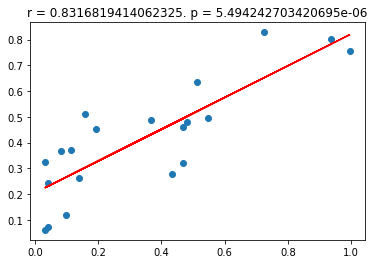

In [ ]:
import matplotlib.pyplot as plt
import random
from scipy.stats import linregress

# Число точек
N = 20

# Linkage factor [0, 1]
F = 0.5

random.seed()

X = [random.uniform(0, 1) for i in range (N)]
Y = [F * X[i] + (1 - F) * random.uniform(0, 1) for i  in range (N)]

lr = linregress(X, Y)

Yregr = [X[i] * lr.slope + lr.intercept for i in range(N)]

figure_title = 'r = {0}. p = {1}'.format(lr.rvalue, lr.pvalue)

plt.scatter(X, Y)

plt.title(figure_title)
plt.plot(X, Yregr, color='red')

plt.show()

b0: 26.480108961529908 b1 -0.10790527018012008
y = 26.48 + -0.11 * x


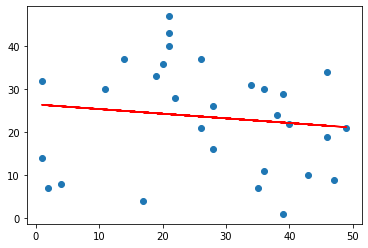

se:  0.16421842920509783
p_value: 0.5164921844710397
p_value(X < -0.66 or X > -0.66) > alpha. Do not reject H0

statsmodels:                              OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.074
Date:                Fri, 17 Sep 2021   Prob (F-statistic):              0.309
Time:                        21:10:49   Log-Likelihood:                -117.48
No. Observations:                  30   AIC:                             239.0
Df Residuals:                      28   BIC:                             241.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as st
 
X = np.random.randint(0, 50, 30)
Y = np.random.randint(0, 50, 30)
 
plt.scatter(X, Y)
 
# H0: b1 = 0
# H1: b1 != 0
alpha = 0.05
df = len(Y) - 2
 
X_mean = np.mean(X)
Y_mean = np.mean(Y)
corr = np.sum((X - X_mean) * (Y - Y_mean)) / (np.sum((X - X_mean) ** 2) * np.sum((Y - Y_mean) ** 2)) ** 0.5
 
X_sd = np.std(X)
Y_sd = np.std(Y)
b1 = (Y_sd / X_sd) * corr
b0 = Y_mean - b1 * X_mean
print('b0:', b0, 'b1', b1)
print(f'y = {b0:.2f} + {b1:.2f} * x')
 
plt.plot(X, b0 + b1 * X, color='red')
plt.show()
 
s2 = np.sum((Y - (b0 + b1 * X)) ** 2) / (df) # оценка дисперсии остатков
se = (s2 / (sum((X - X_mean) ** 2))) ** 0.5
print('se: ', se)
t_value = b1 / se
p_value = 2 * (1 - st.t.cdf(abs(t_value), df))
print('p_value:', p_value)
if p_value > alpha:
    print(f'p_value(X < {t_value:.2f} or X > {t_value:.2f}) > alpha. Do not reject H0')
else:
    print(f'p_value(X < {t_value:.2f} or X > {t_value:.2f}) < alpha. Reject H0')
 
    X2 = sm.add_constant(X)
model = sm.OLS(Y, X2) 
results = model.fit()
print('\nstatsmodels: ', results.summary())

$R^2=1-\frac{SS_{res}}{SS_{total}}$



### 3.5. Условия применения линейной регрессии с одним предиктором
***
**Корреляционная прямая** показывает направление (положительное или отрицательное) и "силу" взаимосвязи. Но в полной мере она входные данные не описывает.

**Регрессионная прямая** описывает наши данные, поэтому на основе этой прямой мы можем предсказывать и те данные, которых не было во входных.
Например: у нас есть данные о цене и площади квартир в каком-то районе. 

**Корреляционная прямая** может показать нам взаимосвязь площади квартиры с её ценой и мы, например, можем узнать, что чем больше площадь - тем выше цена. 

Но если бы нас попросили определить цену для какой-то квартиры - мы бы не смогли сделать это с помощью этой прямой. Тогда бы мы построили регрессионную прямую, которая показывает как площадь квартиры влияет на её стоимость. 

И если для какой-то квартиры (которой не было во входных данных) в этом районе нам известна площадь, а цена не известна, то мы можем использовать регрессионную прямую, чтобы "определить" цену на эту квартиру (с какой-то степенью точности).

https://gallery.shinyapps.io/slr_diag/

**Гомоскедастичность**  - это одинаковая изменчивость зависимой переменной на всех уровнях независимой переменной (постоянная изменчивость остатков)

В случае линейной взаимосвязи двух переменных распределение остатков будет стремиться к нормальному со средним значением, приблизительно равным нулю.

https://statisticsbyjim.com/regression/heteroscedasticity-regression/

### 3.6. Применение регрессионного анализа и интерпретация результатов
***


http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as sm

data = pd.read_csv('http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv')
data.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


Есть данные по штатам с различными значениями:
 - **metro_res** - процент населения живущие в столице
 - **white** - процент белого населения
 - **hs_grad** - процент людей со образованием
 - **poverty** - уровень бедности
 - **female_house** - процент домов, где есть домохозяйки 
 
Исследуем связь уровня образования и бедности, где бедность будет ЗП, а уровень образования НП.

Первое, что нам необходимо сделать, это построить линейную модель, которая наилучшим образом будет описывать наши данные.

$$ \hat{y} = b_0 + b_1x $$

Далле, построив нашу модель, нам надо узнать, насколько хорошо наша объясняет ЗП, для этого найдём коэфицент детерминации $R^2$

Проверим нулевую гипотезу:
$$ b_1 = 0 : H0$$

Третья наша задача, это задача предсказания, по данным НП мы хотим предсказать ЗП.

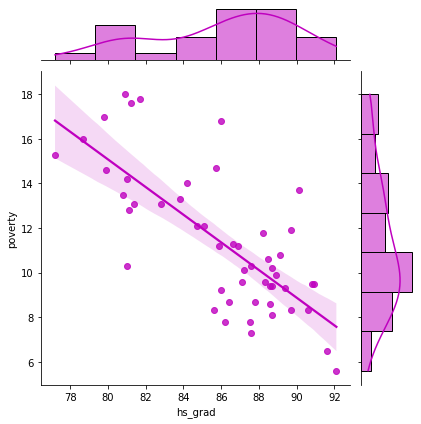

In [4]:
sns.jointplot(x='hs_grad', y='poverty', data=data, kind='reg', color='m')

In [6]:
df_descr = data.describe().transpose()
df_descr

,count,mean,std,min,25%,50%,75%,max
metro_res,51.0,72.249020,15.275894,38.2,60.80,71.6,86.80,100.0
white,51.0,81.719608,13.897223,25.9,76.80,85.4,90.25,97.1
hs_grad,51.0,86.011765,3.725998,77.2,83.30,86.9,88.70,92.1
poverty,51.0,11.349020,3.099185,5.6,9.25,10.6,13.40,18.0
female_house,51.0,11.633333,2.356155,7.8,9.55,11.8,12.65,18.9


In [8]:
result = sm.ols(formula="poverty ~ hs_grad", data=data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                poverty   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     61.81
Date:                Mon, 20 Sep 2021   Prob (F-statistic):           3.11e-10
Time:                        08:23:56   Log-Likelihood:                -108.74
No. Observations:                  51   AIC:                             221.5
Df Residuals:                      49   BIC:                             225.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.7810      6.803      9.523      0.0

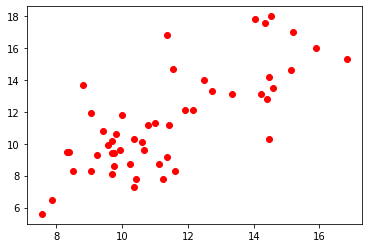

b1------> -0.6212167177940103
b0------> 64.78096577010206
cov-----> -431.2194117647056
Rxy-----> -0.7468582531582505
Sdx-----> 26.346782368563915
SDy-----> 21.91454884272985
X_mean--> 86.01176470588233
y_mean--> 11.349019607843138


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv')
X = df['hs_grad']
y = df['poverty']

X_mean = X.mean()
y_mean = y.mean()

SDx = np.sqrt(sum([(i-X_mean)**2 for i in X]))
SDy = np.sqrt(sum([(i-y_mean)**2 for i in y]))

cov = sum([(i-X_mean)*(j-y_mean) for i, j in zip(X, y)])

Rxy = cov/(SDx*SDy)

b1 = (SDy/SDx) * Rxy
b0 = y_mean - X_mean*b1

def predictor(x):
    y = b0 + b1*x
    return y
    
ploter = [predictor(i) for i in X]
plt.plot(ploter, y , 'ro')
plt.show()
print('b1------>', b1)
print('b0------>', b0)
print('cov----->', cov)
print('Rxy----->', Rxy)
print('Sdx----->', SDx)
print('SDy----->', SDy)
print('X_mean-->', X_mean)
print('y_mean-->', y_mean)


intercept:  64.7809657701021  coef: -0.6212167177940107

 LinregressResult(slope=-0.6212167177940106, intercept=64.78096577010209, rvalue=-0.7468582531582505, pvalue=3.10882981031841e-10, stderr=0.0790164710017928)


,hs_grad,poverty
count,8.000000,8.000000
mean,71.117220,15.287276
std,30.123732,15.131053
min,3.725998,3.099185
25%,70.650000,8.337500
50%,84.655882,10.974510
75%,87.350000,14.550000
max,92.100000,51.000000


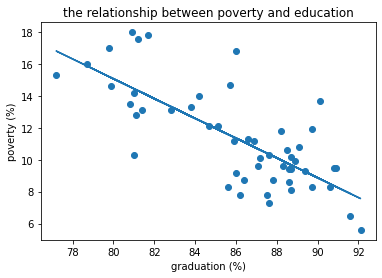

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
url = 'http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv'
data = pd.read_csv(url)
poverty_grad = data[['hs_grad', 'poverty']].describe()
print()
a = data['poverty'].to_numpy().reshape(-1, 1)
b = data['hs_grad'].to_numpy().reshape(-1, 1)


from sklearn.linear_model import LinearRegression
LR = LinearRegression()
model = LR.fit(b, a)

print("intercept: ",model.intercept_[0]," coef:",model.coef_[0][0])

y = [model.intercept_ + model.coef_[0]*i for i in b]
plt.scatter(b, a)
plt.xlabel('graduation (%)')
plt.ylabel('poverty (%)')      
plt.title('the relationship between poverty and education') 
plt.plot(b, y)

print("\n",stats.linregress (data['hs_grad'],data['poverty']))

poverty_grad.describe()

Наша прямая предсказывает, если бы уровень образования (Х) был равен нулю, то уровень бедности(Y) был бы равен 64,78% И за каждый % повышения уровня образования, уровень бедности изменялся бы на -0,62, т.е. уменьшался.

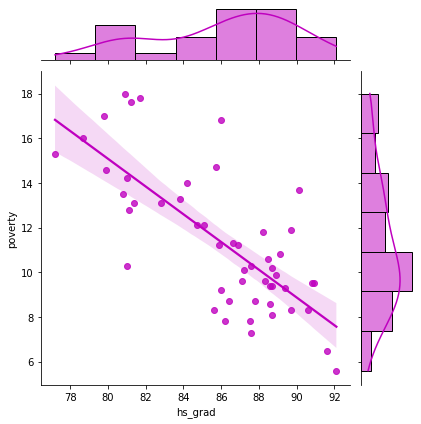

In [ ]:
import seaborn as sns
sns.jointplot(x='hs_grad', y='poverty', data=data, kind='reg', color='m')


https://github.com/MashaKubyshina/Learning_to_code/blob/master/Regression_on_States_Basics_of_Statistics_Class.ipynb

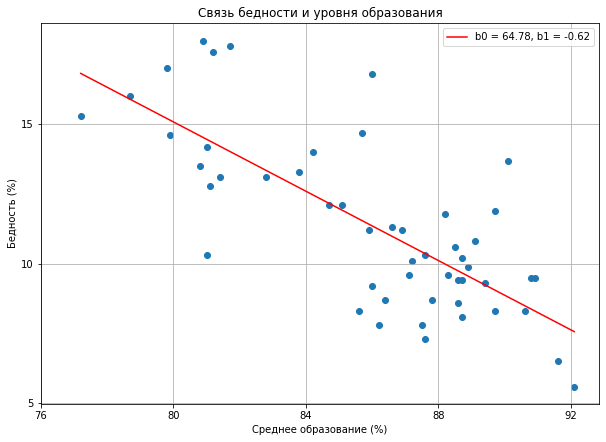

             Estimate  Std.Error  t value      Pr(>|t|)
(Intercept)   64.7810     6.8026     9.52  9.940660e-13
hs_grand      -0.6212     0.0790    -7.86  3.108830e-10

Multiple R-squared: 0.5578,
F-statistic(1,49) = 61.81, p-value = 3.10882981031842e-10


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import scipy.stats as stats
# import numpy as np

# url = 'http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv'
# data = pd.read_csv(url)

# рассчет ковариационной матрицы двух векторов, на выходе ковариация и дисперсии каждого из массивов, 
# или можно рассчитать вручную по формулам из уроков cov - урок 3_1 третье видео; D - урок 1_5 третье видео
X = data['hs_grad']
Y = data['poverty']
ssxm, ssxym, ssyxm, ssym = np.cov(X,Y).flat

# рассчет корреляции по формуле из урока 3_1 третье видео: r = cov/stdx*stdy, 
# т. к. в ковариационной матрице у нас дисперсии, то в знаменателе нужно взять квадратный корень 
if ssxm == 0 or ssym == 0:
    r = 0
else:
    r = ssxym / (ssxm * ssym)**0.5
    
# расчет slope и intercept из урока 3_3 второе видео: slope = (stdy/stdx) * r
slope = r * (ssym/ssxm)**0.5
intercept = np.mean(Y) - slope * np.mean(X)

df = len(X) - 2
# рассчет t - значения, вероятности p и стандартной ошибки для X параметра подсмотренно тут: 
# https://github.com/scipy/scipy/blob/v1.4.1/scipy/stats/_stats_mstats_common.py#L15-L144
tx = r * np.sqrt(df / ((1.0 - r)*(1.0 + r)))
sterrestx = np.sqrt((1 - r**2) * ssym / ssxm / df)
px = 2 * stats.t.sf(np.abs(tx), df)

# Находим сумму квадратов по параметру X
s = [i**2 for i in X]
sterresty = (sterrestx**2/51*sum(s))**0.5

# рассчет t - значения, вероятности p и стандартной ошибки для Y параметра подсмотренно тут: 
# https://en.wikipedia.org/wiki/Simple_linear_regression
ty = intercept/sterresty
py = 2 * stats.t.sf(np.abs(ty), df)

# рассчет F-статистики подсмотренно тут:
# https://www.chem-astu.ru/science/reference/fischer.html
F = r**2/(1-r**2)*df
p_val = stats.f.sf(F, 1, df)

# создаем таблицу как в лекции
ttlinear = pd.DataFrame(data = {
    'Estimate':[round(num, 4) for num in [intercept,slope]], 'Std.Error':[round(num, 4) for num in [sterresty, sterrestx]], 
    't value':[round(num, 2) for num in [ty,tx]], 'Pr(>|t|)':[py,px]}, 
                        index = ['(Intercept)','hs_grand'])

# вычисляем остатки
#residuals = Y - intercept - slope*X

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# точечный график
ax1.scatter(X,Y)

# регрессионная прямая
x1=np.linspace(min(X),max(X),51)
y1=intercept + slope*x1
plt.plot(x1,y1,'-r',label='b0 = {}, b1 = {}'.format(round(intercept,2), round(slope,2)))

plt.grid()
plt.title('Связь бедности и уровня образования')
plt.xlabel('Среднее образование (%)')
plt.ylabel('Бедность (%)')
plt.xticks(np.arange(76,93, step=4))
plt.yticks(np.arange(5,18, step=5))
plt.legend(loc='upper right')
plt.show()


print(ttlinear)
print('')
print('Multiple R-squared: {},'.format(round(r**2,4)))
print('F-statistic(1,{}) = {}, p-value = {}'.format(df, round(F,2), p_val))

https://gigabaza.ru/doc/27078-pall.html

Корреляция - -0,75 (связь есть и она обратнопропорциональная, не очень сильная),
детерминация - 0,55 (55% изменений в бедности обуславливаются уровнем образования, это немного)
b1 = -0,62, (при +1% к образованному населению бедность уменьшится на 0,62%)

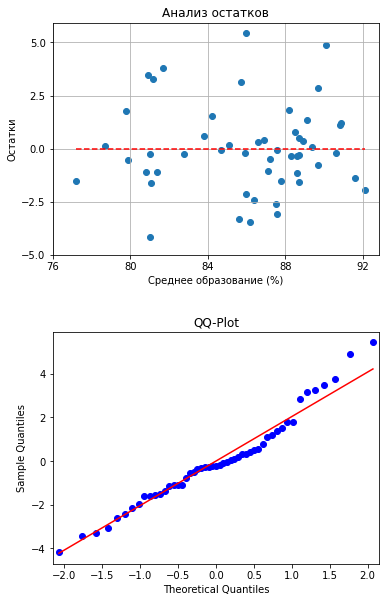

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import statsmodels.api as sma

# получаем данные и вычисляем коэффициэнты регрессионной модели
intercept, slope = sm.ols(formula="poverty ~ hs_grad", data=data).fit().params
X = data['hs_grad']
Y = data['poverty']

# вычисляем остатки - на сколько Y далека от теоретической модели
residuals = Y - intercept - slope*X
x1=np.linspace(min(X),max(X),len(X))

# создаем графики
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6, 9))
# scatter plot
ax1.scatter(X,residuals)
ax1.plot(x1,[0]*len(x1),'--r')
# Q-Q plot
sma.qqplot(residuals, line='s', ax = ax2)

ax1.grid()
ax1.set_title('Анализ остатков')
ax1.set_xlabel('Среднее образование (%)')
ax1.set_ylabel('Остатки')
ax1.set_xticks(np.arange(76,93, step=4))
ax1.set_yticks(np.arange(-5,6, step=2.5))

ax2.set_title('QQ-Plot')

fig.tight_layout(pad=3.0)
plt.show()

### 3.7. Задача предсказания значений зависимой переменной
***
Имея уравнение регрессии, задача прогнозирования сводится к решению уравнения 
$$ y = b_0 + b_1x $$

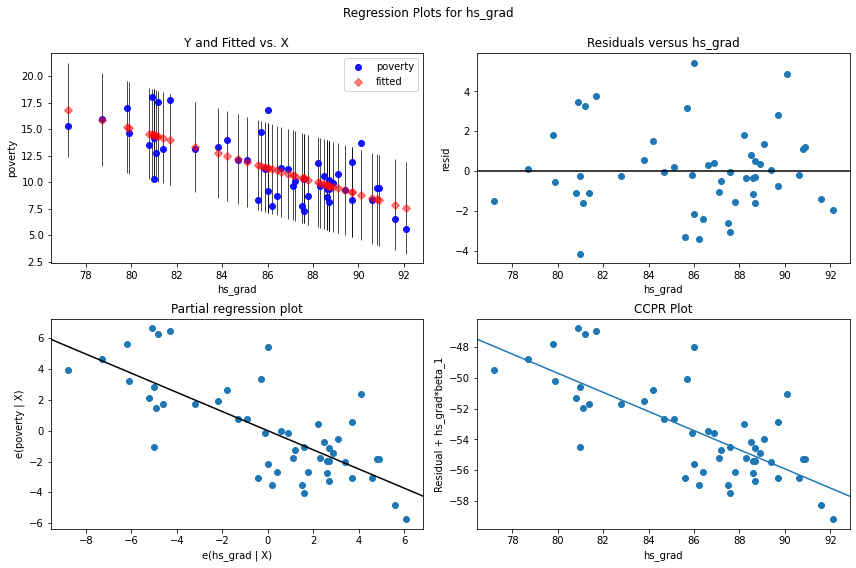

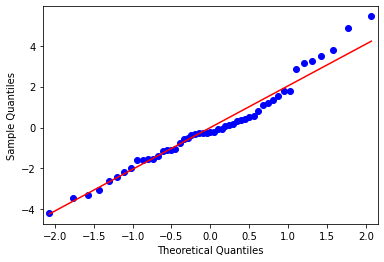

0    26.265529
dtype: float64

In [ ]:
# ячейка 1
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# ячейка 2
url = 'https://stepik.org/media/attachments/lesson/8086/states.csv'
df = pd.read_csv(url)

# ячейка 3
model = smf.ols(formula="poverty ~ hs_grad", data=df).fit()
model.summary()

# ячейка 4
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'hs_grad', fig=fig)

# ячейка 5
residuals = model.resid
fig = sm.qqplot(residuals, line='s')
plt.show()

# ячейка 6
p = [62]
p = pd.DataFrame({'hs_grad': p})
model.predict(p)

### 3.8. Регрессионный анализ с несколькими независимыми переменными
***
Множественная регрессия (Multiple Regression)  позволяет исследовать влияние сразу нескольких независимых переменных на одну зависимую переменную.

Требования к данным
- линейная зависимость переменных
- нормальное распредление остатков
- гомоскедастичность данных
- проверка на мультиколлиарность
- нормальное распределение переменных (желательно)

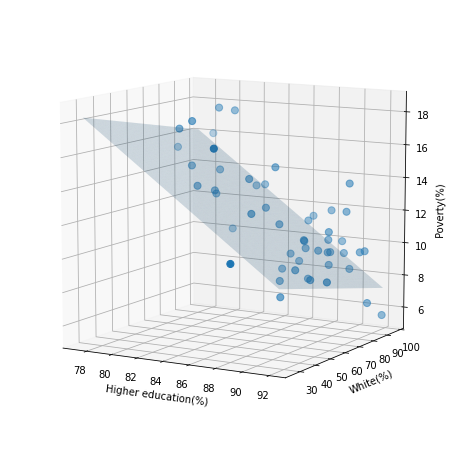

In [10]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv('http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv')

X = data[['white', 'hs_grad']]
y = data['poverty']

reg = LinearRegression().fit(X, y)

d1, d2 = list(), list()
for x in np.linspace(min(data['white']), max(data['white']), 100):
    for y in np.linspace(min(data['hs_grad']), max(data['hs_grad']), 100):
        d1.append(x)
        d2.append(y)
d1 = np.array(d1).reshape(-1, 1)
d2 = np.array(d2).reshape(-1, 1)
p = reg.predict(np.concatenate([d1, d2], axis=1))


fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')

ax.scatter(data['hs_grad'], data['white'], data['poverty'], s=50)

ax.plot_trisurf(d2.ravel(), d1.ravel(), p.ravel(), alpha=0.2)

ax.set_xlabel('Higher education(%)')
ax.set_ylabel('White(%)')
ax.set_zlabel('Poverty(%)')

ax.elev = 10
ax.azim = -60

plt.show()

### 3.9. Выбор наилучшей модели
***


### 3.10. Классификация: логистическая регрессия и кластерный анализ
***


### 3.11. GLM и продвинутые темы
***

### 3.12. Заключение
***
